<h1>Import libraries</h1>

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import  LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

<h1>Load Dataset</h1>

In [3]:
df=pd.read_csv(r'E:\Internship\Dataset\adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
#shape
df.shape

(48842, 15)

In [10]:
#columns name
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [11]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [12]:
#dataset describe
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [15]:
df.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


In [14]:
for i in df.columns:
    print(i,df[i].nunique())

age 74
workclass 9
fnlwgt 28523
education 16
educational-num 16
marital-status 7
occupation 15
relationship 6
race 5
gender 2
capital-gain 123
capital-loss 99
hours-per-week 96
native-country 42
income 2


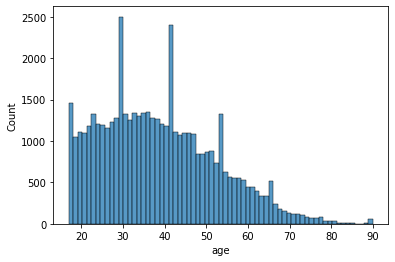

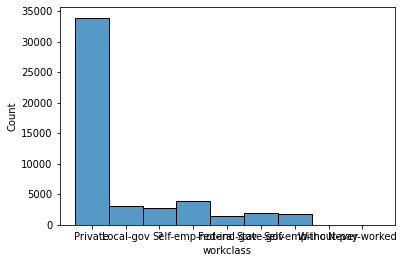

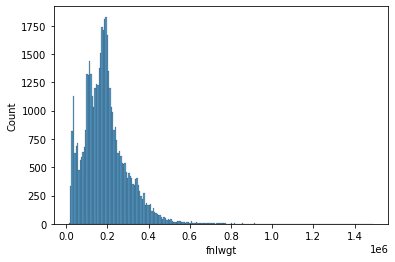

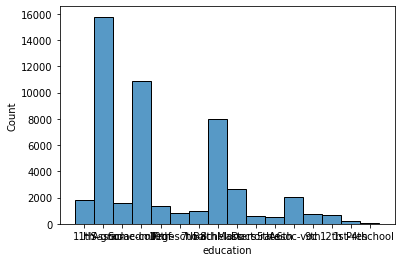

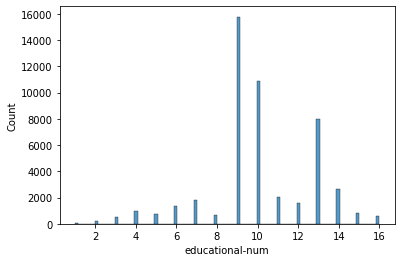

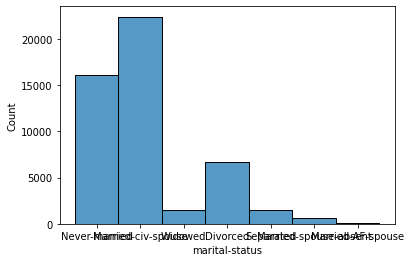

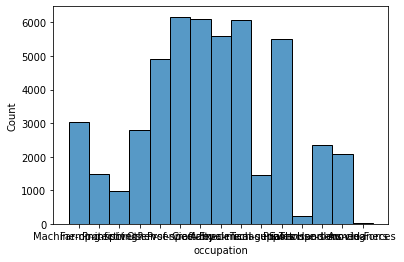

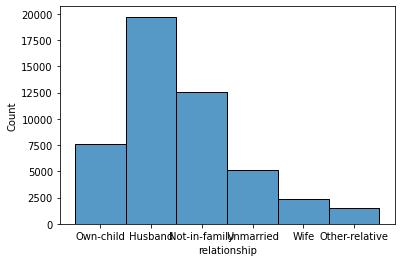

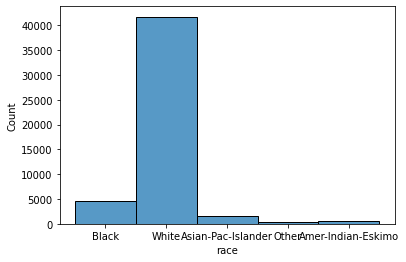

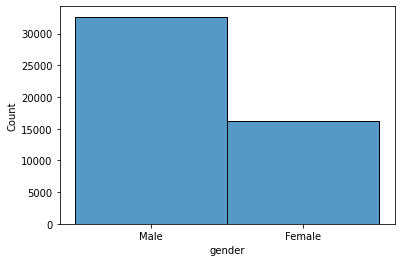

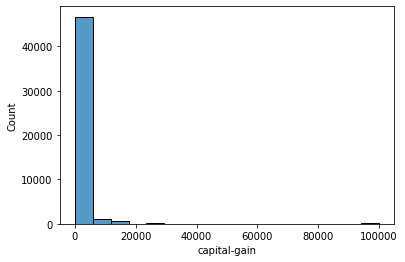

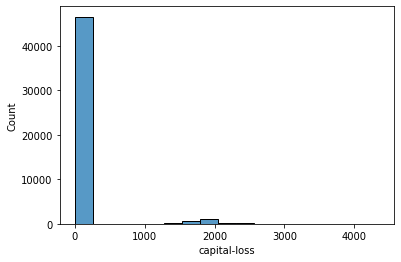

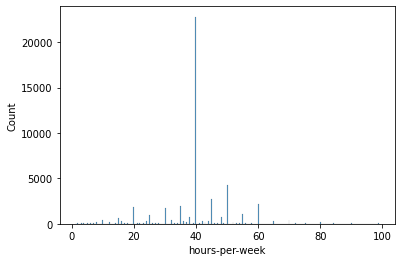

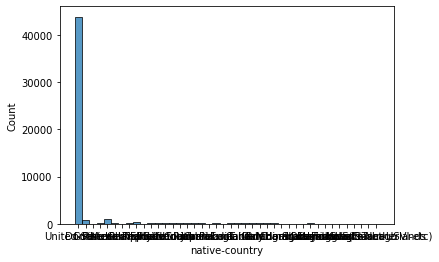

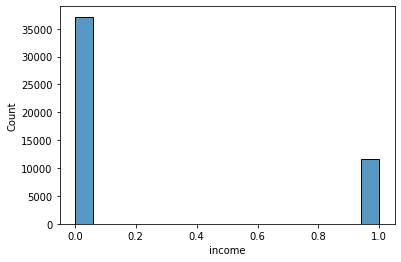

In [97]:
for i in df.columns:
    sns.histplot(df[i])
    plt.show()

<h3>Boxplot</h3>

<AxesSubplot:xlabel='income', ylabel='age'>

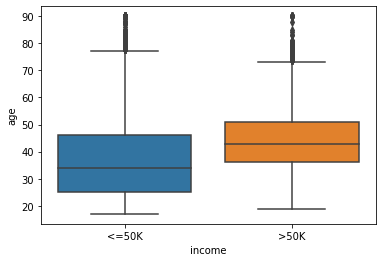

In [16]:
sns.boxplot(x='income',y='age',data=df)

<AxesSubplot:xlabel='income', ylabel='fnlwgt'>

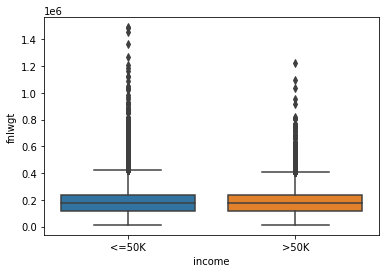

In [20]:
sns.boxplot(x='income',y='fnlwgt',data=df)          

<AxesSubplot:xlabel='income', ylabel='educational-num'>

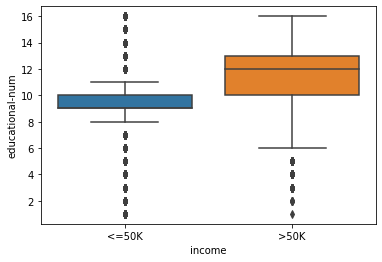

In [21]:
sns.boxplot(x='income',y='educational-num',data=df)  

<AxesSubplot:xlabel='income', ylabel='capital-gain'>

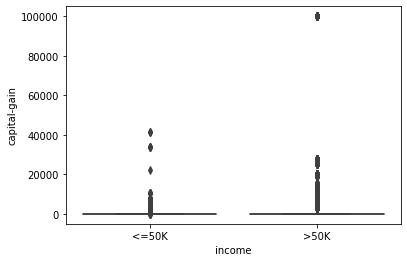

In [22]:
sns.boxplot(x='income',y='capital-gain',data=df)  

<AxesSubplot:xlabel='income', ylabel='capital-loss'>

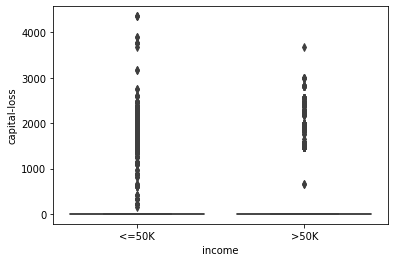

In [23]:
sns.boxplot(x='income',y='capital-loss',data=df)  

<AxesSubplot:xlabel='income', ylabel='hours-per-week'>

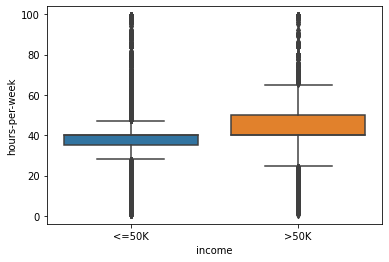

In [24]:
sns.boxplot(x='income',y='hours-per-week',data=df)  

<h1>Checking null values</h1>

In [25]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [28]:
df.income.unique()

array(['<=50K', '>50K'], dtype=object)

<h3>Replacing income column value</h3>

In [29]:
df['income']=df['income'].replace(['<=50K', '>50K'],(0,1))

In [30]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0


In [31]:
df.income.unique()

array([0, 1], dtype=int64)

<AxesSubplot:>

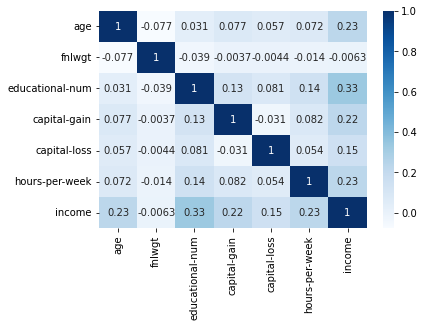

In [39]:
#heatmap
sns.heatmap(df.corr(),annot=True,cmap='Blues')

<AxesSubplot:xlabel='workclass', ylabel='count'>

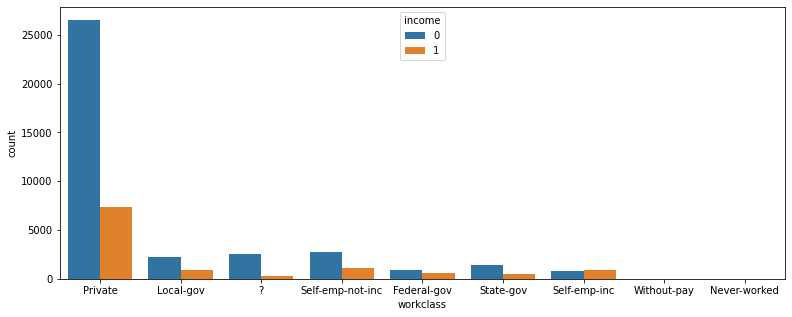

In [53]:
plt.figure(figsize=(13,5))
sns.countplot(x='workclass',data=df,hue=df.income)

<AxesSubplot:xlabel='education', ylabel='count'>

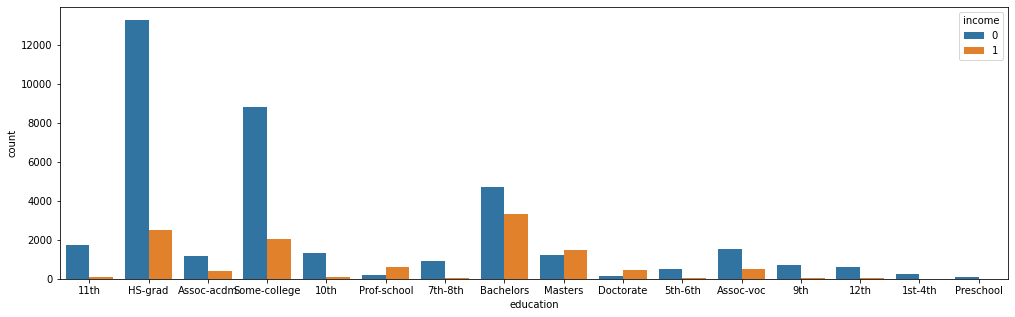

In [56]:
plt.figure(figsize=(17,5))
sns.countplot(x='education',data=df,hue=df.income)

<AxesSubplot:xlabel='relationship', ylabel='count'>

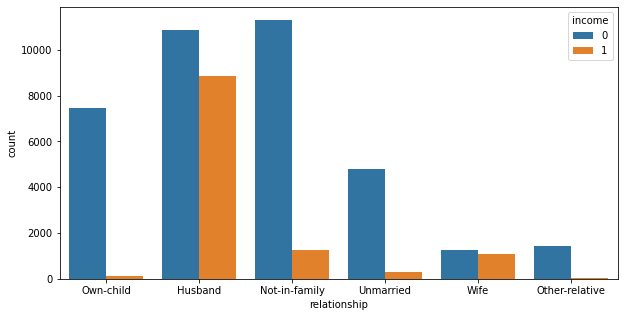

In [58]:
plt.figure(figsize=(10,5))
sns.countplot(x='relationship',data=df,hue=df.income)

In [59]:
df.gender.unique()

array(['Male', 'Female'], dtype=object)

<AxesSubplot:xlabel='gender', ylabel='count'>

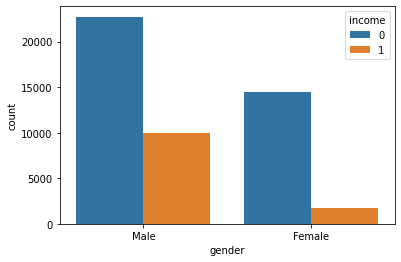

In [60]:
sns.countplot(x='gender',data=df,hue=df.income)

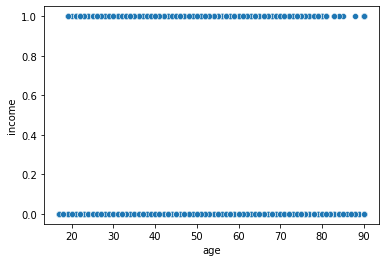

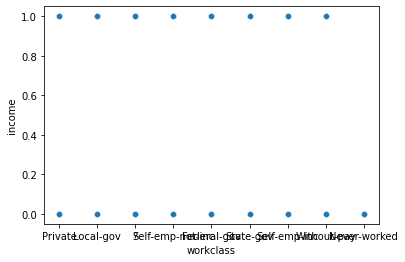

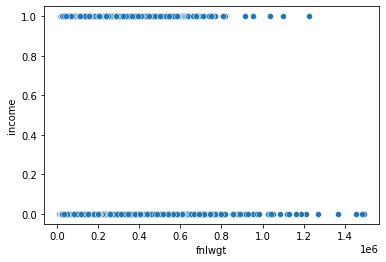

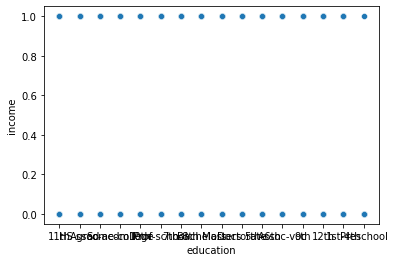

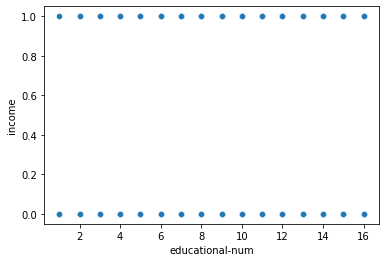

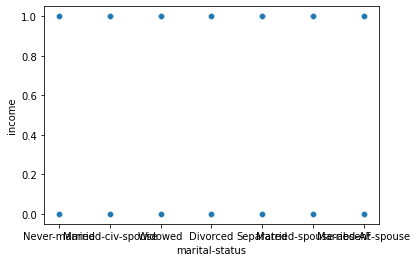

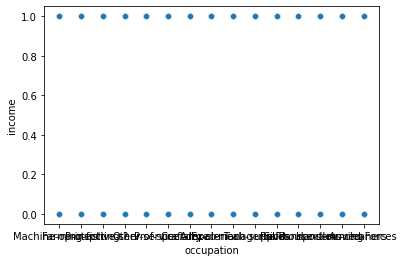

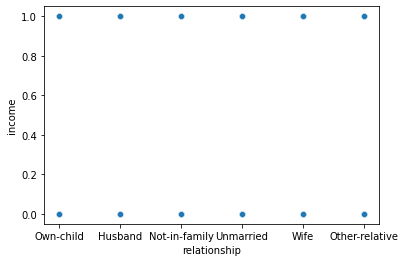

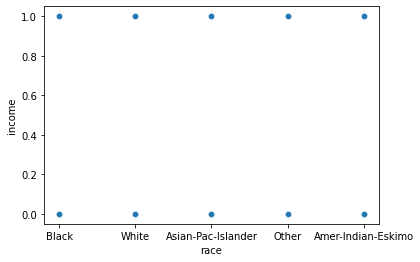

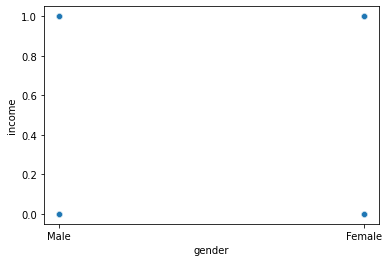

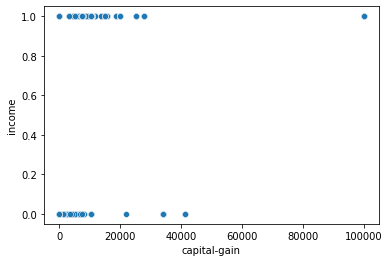

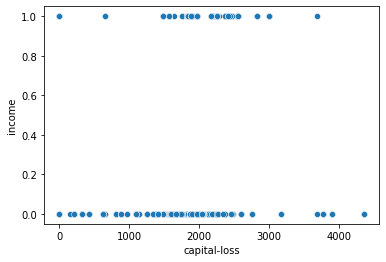

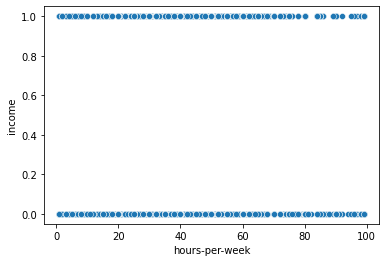

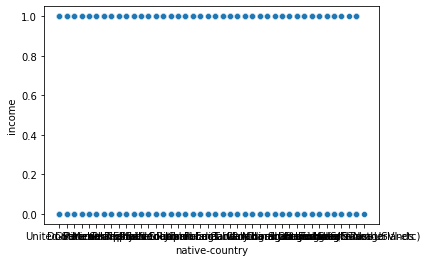

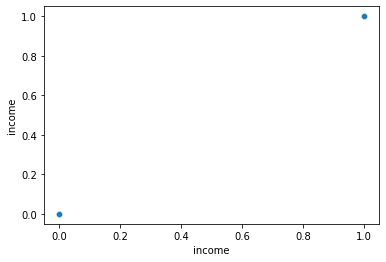

In [93]:
#scatterplot
for i in df.columns:
    sns.scatterplot(x=df[i],y=df['income'])
    plt.show()

<h1>Data Preprocessing</h1>

In [102]:
x=df.drop(['income'],axis=1)
x.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States


In [104]:
numericalcols=list(df.select_dtypes(exclude='object').columns)
numericalcols.pop()
numericalcols

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [105]:
x=pd.get_dummies(x)
x.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [106]:
data=df.drop(['fnlwgt'],axis=1)

In [107]:
numericalcols

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [108]:
from sklearn.preprocessing import StandardScaler
M=StandardScaler()
x[numericalcols]=M.fit_transform(x[numericalcols])

In [109]:
x.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,-0.995129,0.351675,-1.197259,-0.144804,-0.217127,-0.034087,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,-0.046942,-0.945524,-0.419335,-0.144804,-0.217127,0.772930,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.776316,1.394723,0.747550,-0.144804,-0.217127,-0.034087,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.390683,-0.277844,-0.030373,0.886874,-0.217127,-0.034087,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-1.505691,-0.815954,-0.030373,-0.144804,-0.217127,-0.841104,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [110]:
y=data.income

In [111]:
x_train,x_test,y_trian,y_test=train_test_split(x,y,random_state=89,test_size=0.3)

<h1>LogisticRegression</h1>

In [114]:
ModelL=LogisticRegression()

In [115]:
ModelL.fit(x_train,y_trian)

C:\Users\azada\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [116]:
ModelL.score(x_test,y_test)

0.8536135944857708

In [117]:
y_predictL=ModelL.predict(x_test)

In [118]:
accuracy_score(y_test,y_predictL)

0.8536135944857708

C:\Users\azada\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\azada\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


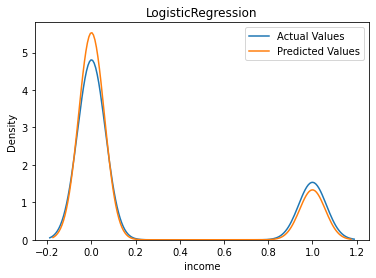

In [119]:
ax=sns.distplot(y_test,hist=False,label='Actual Values')
ax=sns.distplot(y_predictL,hist=False,label='Predicted Values')
ax.set_title('LogisticRegression')
plt.legend()

In [120]:
confusion_matrix(y_test,y_predictL)

array([[10384,   722],
       [ 1423,  2124]], dtype=int64)

<AxesSubplot:>

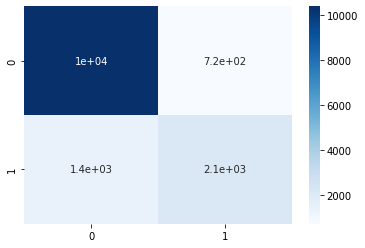

In [121]:
sns.heatmap(confusion_matrix(y_test,y_predictL),annot=True,cmap='Blues')

<h1>KNeighborsClassifier</h1>

In [124]:
ModelK=KNeighborsClassifier(n_neighbors=13)

In [125]:
ModelK.fit(x_train,y_trian)
ModelK.score(x_test,y_test)

0.8433767829113492

C:\Users\azada\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\azada\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


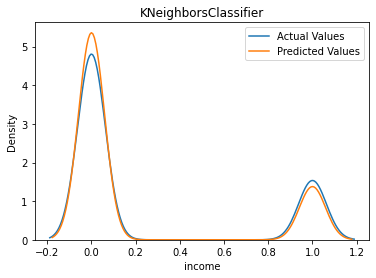

In [126]:
ax=sns.distplot(y_test,hist=False,label='Actual Values')
ax=sns.distplot(ModelK.predict(x_test),hist=False,label='Predicted Values')
ax.set_title('KNeighborsClassifier')
plt.legend()

In [127]:
confusion_matrix(y_test,ModelK.predict(x_test))

array([[10234,   872],
       [ 1423,  2124]], dtype=int64)

<AxesSubplot:>

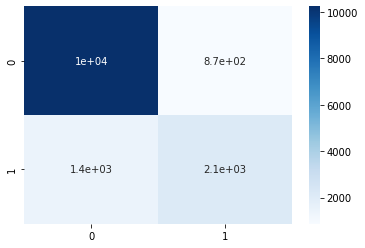

In [128]:
sns.heatmap(confusion_matrix(y_test,ModelK.predict(x_test)),annot=True,cmap='Blues')